#### Exam description
For this exam, you will predict the target values for the test.csv. 

#### Your task:
find a good machine learning model to predict the target value. Then predict the target values of the instances in the test.csv. 

#### Exam rules
- You can use only the machine learning models discussed in this course. 
    - If the prediction is based on a model that is not discussed in class, one of the models in your submission will randomly be selected for grading. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 
- Save the final prediction array as ``final_test_prediction``. 
- <font color = 'red'> The final prediction will be evaluated using the **recall** function. </font>

#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|Machine learning model | Demonstrate limited understanding of methods used to train machine learning models | Demonstrate the ability to understand techniques used to train machine learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

#### Dataset
This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. For more information about the dataset, please refer to the paper:
Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.


#### Attribute Information:

* destination: No Urgent Place, Home, Work
* passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
* weather: Sunny, Rainy, Snowy
* temperature:55, 80, 30
* time: 2PM, 10AM, 6PM, 7AM, 10PM
* coupon: Restaurant(<$\$$20), Coffee House, Carry out & Take away, Bar, Restaurant($\$$20-$\$$50)
* expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
* gender: Female, Male
* age: 21, 46, 26, 31, 41, 50plus, 36, below21
* maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
* has_Children:1, 0
* education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
* occupation: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
* income: $\$$37500 - $\$$49999, $\$$62500 - $\$$74999, $\$$12500 - $\$$24999, $\$$75000 - $\$$87499, $\$$50000 - $\$$62499, $\$$25000 - $\$$37499, $\$$100000 or More, $\$$87500 - $\$$99999, Less than $\$$12500
* Bar: never, less1, 1\~3, gt8, nan, 4\~8 (feature meaning: how many times do you go to a bar every month?)
* CoffeeHouse: never, less1, 4\~8, 1\~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
* CarryAway:n4\~8, 1\~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
* RestaurantLessThan20: 4\~8, 1\~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $\$$20 every month?)
* Restaurant20To50: 1\~3, less1, never, gt8, 4\~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $\$$20 - $\$$50 every month?)
* toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
* toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
* direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* Y:1, 0 (whether the coupon is accepted)

## Libraries

In [349]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import random

from tqdm import tqdm

from mlxtend.plotting import plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, auc, classification_report, log_loss, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
##knn
from sklearn.neighbors import KNeighborsClassifier
##support vector machine
from sklearn.svm import LinearSVC, NuSVC, SVC
##Linear model method
from sklearn.linear_model import LogisticRegression, SGDClassifier
##tree based method
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
##ensamble method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomTreesEmbedding, StackingClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
#pca
from sklearn.decomposition import PCA, IncrementalPCA

from prettytable import PrettyTable

# Preprocessing ``train.csv`` (15 points)

In [350]:
df_train = pd.read_csv('train.csv')

In [351]:
df_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Partner,Sunny,30.0,10AM,Bar,1d,Female,50plus,Single,...,1~3,less1,1~3,less1,1,1,0,0,1,0
1,Home,Alone,Sunny,80.0,6PM,Coffee House,2h,Female,26,Unmarried partner,...,less1,1~3,less1,1~3,1,0,0,0,1,1
2,Work,Alone,Sunny,55.0,7AM,Restaurant(<20),1d,Male,50plus,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
3,No Urgent Place,Kid(s),Sunny,80.0,10AM,Bar,1d,Female,NaN,Married partner,...,less1,4~8,1~3,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,30.0,10PM,Restaurant(<20),2h,Male,26,Married partner,...,1~3,1~3,4~8,4~8,1,0,0,0,1,1


In [352]:
df_train.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2373,Work,Alone,Snowy,30.0,7AM,Restaurant(20-50),1d,Female,50plus,Married partner,...,4~8,NaN,4~8,4~8,1,1,1,0,1,1
2374,No Urgent Place,Alone,Rainy,55.0,10AM,Bar,1d,Male,50plus,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
2375,Work,Alone,Sunny,55.0,7AM,Bar,1d,Male,26,Unmarried partner,...,4~8,gt8,1~3,1~3,1,1,1,0,1,0
2376,Work,Alone,Sunny,80.0,7AM,Coffee House,2h,Female,41,Married partner,...,1~3,4~8,gt8,less1,1,1,0,1,0,1
2377,Home,Alone,Sunny,80.0,6PM,Coffee House,2h,Male,36,Married partner,...,never,4~8,4~8,1~3,1,0,0,0,1,0


Dataset's Shape

In [353]:
print("Total Number of Columns: ", df_train.shape[1])
print("Total Number of Rows: ", df_train.shape[0])

Total Number of Columns:  26
Total Number of Rows:  2378


General information about dataset

In [354]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           2378 non-null   object 
 1   passanger             2378 non-null   object 
 2   weather               2331 non-null   object 
 3   temperature           2344 non-null   float64
 4   time                  2378 non-null   object 
 5   coupon                2378 non-null   object 
 6   expiration            2378 non-null   object 
 7   gender                2329 non-null   object 
 8   age                   2326 non-null   object 
 9   maritalStatus         2378 non-null   object 
 10  has_children          2332 non-null   float64
 11  education             2378 non-null   object 
 12  occupation            2378 non-null   object 
 13  income                2378 non-null   object 
 14  car                   16 non-null     object 
 15  Bar                  

We can see that there are some null values in the dataset.

In [355]:
print("Total number of Null Values: ", df_train.isnull().sum().sum())

Total number of Null Values:  2726


Various descriptive statistics on the DataFrame

In [356]:
df_train.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2344.000000,2332.000000,2378.0,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000
mean,86.248294,0.419811,1.0,0.560555,0.112279,0.224138,0.775862,0.558873
std,147.929170,0.493634,0.0,0.496424,0.315776,0.417101,0.417101,0.496626
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,999.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Corrrelation Matrix

In [357]:
cor_mat = df_train.corr() 
cor_mat

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.001727,NaN,-0.020064,-0.017403,0.010645,-0.010645,-0.035763
has_children,-0.001727,1.000000,NaN,0.067060,-0.024737,-0.023718,0.023718,-0.058716
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.020064,0.067060,NaN,1.000000,0.314887,-0.306343,0.306343,-0.064806
toCoupon_GEQ25min,-0.017403,-0.024737,NaN,0.314887,1.000000,-0.191151,0.191151,-0.091797
direction_same,0.010645,-0.023718,NaN,-0.306343,-0.191151,1.000000,-1.000000,0.012431
direction_opp,-0.010645,0.023718,NaN,0.306343,0.191151,-1.000000,1.000000,-0.012431
Y,-0.035763,-0.058716,NaN,-0.064806,-0.091797,0.012431,-0.012431,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

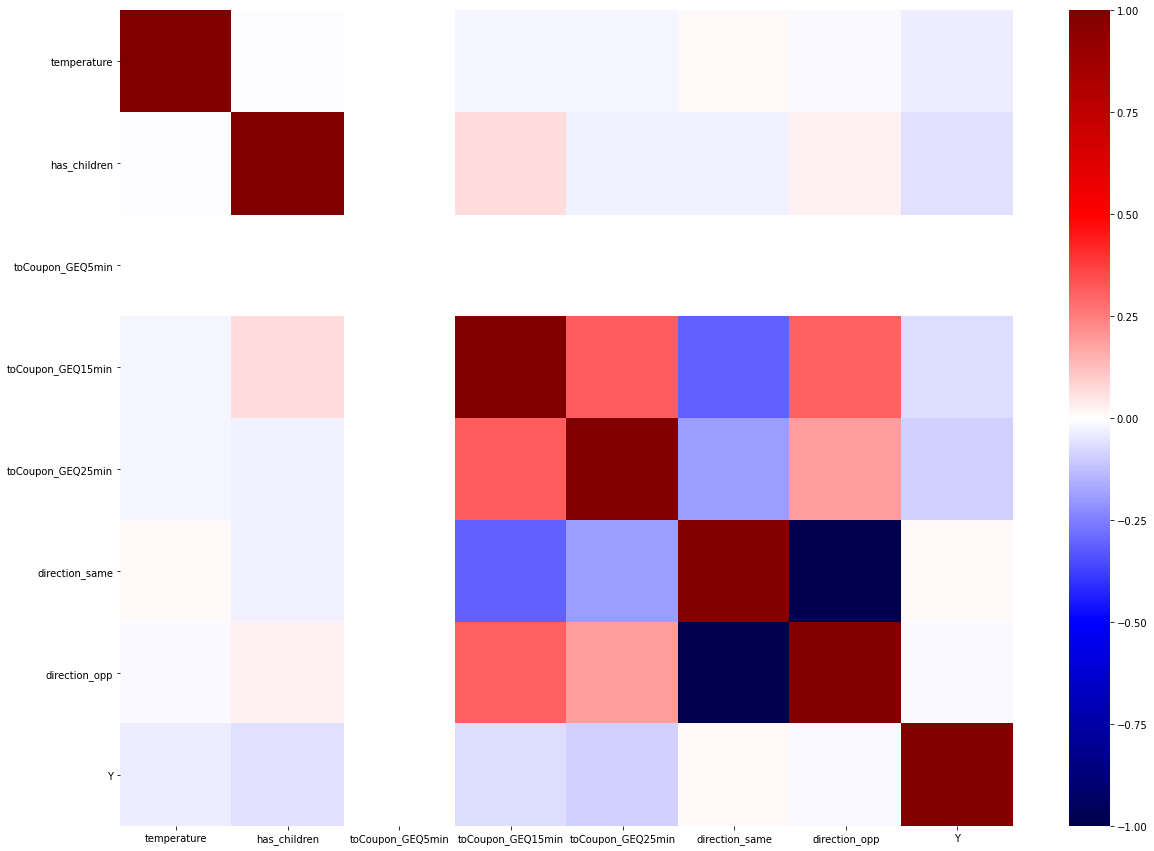

In [358]:
plt.figure(figsize=(20,15))
sns.heatmap(cor_mat, vmin = -1, vmax = 1, cmap= "seismic")
plt.gca().patch.set(hatch = "df", edgecolor = "#555")
plt.show

### Box Plots of Numerical Variables

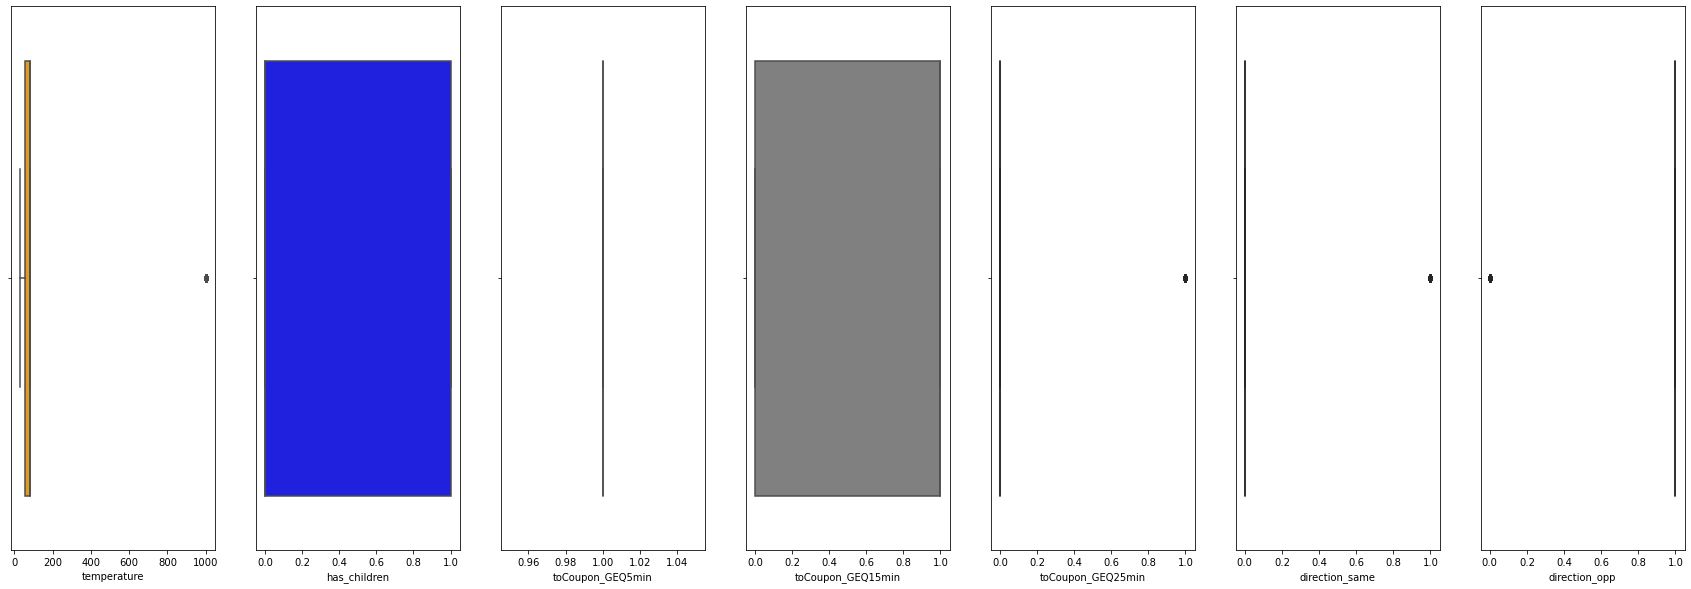

In [359]:
fig, axes = plt.subplots(ncols=7, figsize=(30,10))
box_plot1 = sns.boxplot(df_train['temperature'], ax=axes[0], color = 'orange')
box_plot2 = sns.boxplot(df_train['has_children'], ax=axes[1], color = 'blue')
box_plot3 = sns.boxplot(df_train['toCoupon_GEQ5min'], ax=axes[2], color = 'Yellow')
box_plot4 = sns.boxplot(df_train['toCoupon_GEQ15min'], ax=axes[3], color = 'Gray')
box_plot5 = sns.boxplot(df_train['toCoupon_GEQ25min'], ax=axes[4], color = 'green')
box_plot6 = sns.boxplot(df_train['direction_same'], ax=axes[5], color = 'green')
box_plot7 = sns.boxplot(df_train['direction_opp'], ax=axes[6], color = 'maroon')

plt.show()

### Handling Individual Features

#### Feature: Target Variable(Y)

In [360]:
print("Variable Statistics: ")
df_train['Y'].describe()

Variable Statistics: 


count    2378.000000
mean        0.558873
std         0.496626
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Y, dtype: float64

In [361]:
print("Total number of null values:", df_train['Y'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

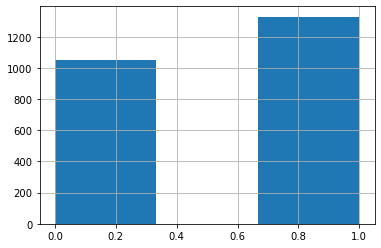

In [362]:
df_train['Y'].hist(bins=3)

#### Feature: Destination

In [363]:
print("Variable Statistics: ")
df_train['destination'].describe()

Variable Statistics: 


count                2378
unique                  3
top       No Urgent Place
freq                 1175
Name: destination, dtype: object

In [364]:
print("Total number of null values:", df_train['destination'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

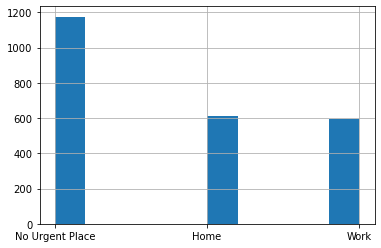

In [365]:
df_train['destination'].hist()

We replace the column Destination with dummy variables.

In [366]:
cols = pd.get_dummies(df_train['destination'], prefix= 'destination')
df_train[cols.columns] = cols
df_train.drop('destination', axis = 1, inplace = True)

#### Feature: Passanger

In [367]:
print("Variable Statistics: ")
df_train['passanger'].describe()

Variable Statistics: 


count      2378
unique        4
top       Alone
freq       1398
Name: passanger, dtype: object

In [368]:
print("Total number of null values:", df_train['passanger'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

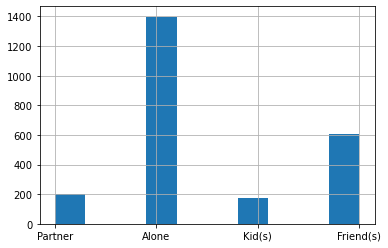

In [369]:
df_train['passanger'].hist()

We replace the column Passanger with dummy variables.

In [370]:
cols = pd.get_dummies(df_train['passanger'], prefix= 'passanger')
df_train[cols.columns] = cols
df_train.drop('passanger', axis = 1, inplace = True)

#### Feature: Weather

In [371]:
print("Variable Statistics: ")
df_train[['Y', 'weather']].groupby('weather').count()

Variable Statistics: 


,Y
weather,
Rainy,244
Snowy,241
Sunny,1846


In [372]:
print("Total number of null values:", df_train['weather'].isnull().sum())

Total number of null values: 47


<AxesSubplot:>

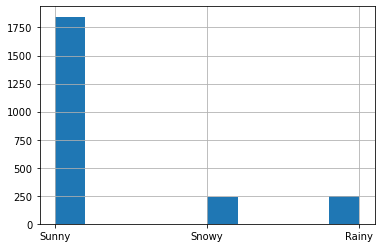

In [373]:
df_train['weather'].hist()

Since the majority of weather is sunny, so we replace the missing values with mode.

In [374]:
df_train['weather'] = df_train['weather'].fillna(df_train['weather'].mode()[0])

We replace this column with dummy variables.

In [375]:
cols = pd.get_dummies(df_train['weather'], prefix= 'weather')
df_train[cols.columns] = cols
df_train.drop('weather', axis = 1, inplace = True)

#### Feature: Temperature

In [376]:
print("Variable Statistics: ")
df_train['temperature'].describe()

Variable Statistics: 


count    2344.000000
mean       86.248294
std       147.929170
min        30.000000
25%        55.000000
50%        80.000000
75%        80.000000
max       999.000000
Name: temperature, dtype: float64

In [377]:
print("Total number of null values:", df_train['temperature'].isnull().sum())

Total number of null values: 34


<AxesSubplot:>

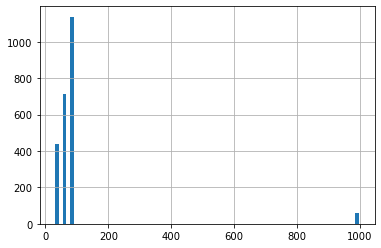

In [378]:
df_train['temperature'].hist(bins =80)

Since the majority of temperature is 80, so we will replace the null values with mode.

In [379]:
df_train['temperature'] = df_train['temperature'].fillna(df_train['temperature'].mode()[0])

We replace this column with dummy variables.

In [380]:
cols = pd.get_dummies(df_train['temperature'], prefix= 'temperature')
df_train[cols.columns] = cols
df_train.drop('temperature', axis = 1, inplace = True)

#### Feature: Time

In [381]:
print("Variable Statistics: ")
df_train['time'].describe()

Variable Statistics: 


count     2378
unique       5
top        6PM
freq       593
Name: time, dtype: object

In [382]:
print("Total number of null values:", df_train['time'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

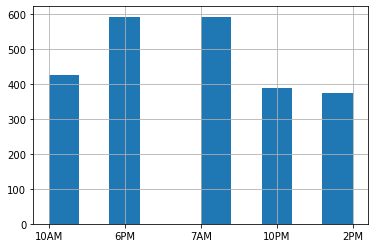

In [383]:
df_train['time'].hist()

We replace this column with dummy variables.

In [384]:
cols = pd.get_dummies(df_train['time'], prefix= 'time')
df_train[cols.columns] = cols
df_train.drop('time', axis = 1, inplace = True)

#### Feature: Coupon

In [385]:
print("Variable Statistics: ")
df_train['coupon'].describe()

Variable Statistics: 


count             2378
unique               5
top       Coffee House
freq               750
Name: coupon, dtype: object

In [387]:
print("Total number of null values:", df_train['coupon'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

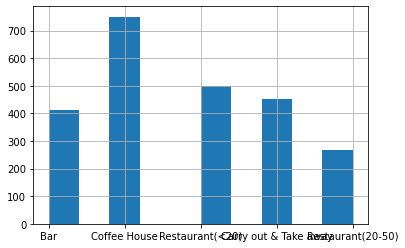

In [388]:
df_train['coupon'].hist()

We replace this column with dummy variables.

In [389]:
cols = pd.get_dummies(df_train['coupon'], prefix= 'coupon')
df_train[cols.columns] = cols
df_train.drop('coupon', axis = 1, inplace = True)

#### Feature: Expiration

In [390]:
print("Variable Statistics: ")
df_train['expiration'].describe()

Variable Statistics: 


count     2378
unique       2
top         1d
freq      1329
Name: expiration, dtype: object

In [391]:
print("Total number of null values:", df_train['expiration'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

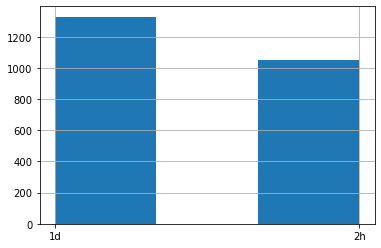

In [392]:
df_train['expiration'].hist(bins =3)

The frequent class in column Expiration is 1d, so we map 1d to 1 and 2h to 0.

In [394]:
df_train['expiration'] = df_train['expiration'].map({'1d':1, '2h':0}).astype(int)

#### Feature: Gender

In [395]:
print("Variable Statistics: ")
df_train['gender'].describe()

Variable Statistics: 


count       2329
unique         2
top       Female
freq        1214
Name: gender, dtype: object

In [396]:
print("Total number of null values:", df_train['gender'].isnull().sum())

Total number of null values: 49


<AxesSubplot:>

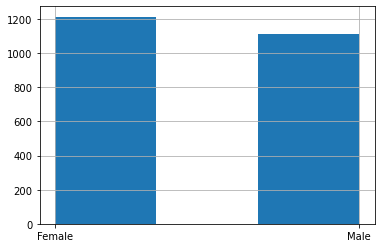

In [397]:
df_train['gender'].hist(bins=3)

So we can see that there are majority of females, so we will replace the null values with mode.

In [398]:
df_train['gender'] = df_train['gender'].fillna(df_train['gender'].mode()[0])

The frequent class in column Gender is Female, so we map Female to 1 and Male to 0.

In [399]:
df_train['gender'] = df_train['gender'].map({'Female':1, 'Male':0}).astype(int)

#### Feature: Age

In [400]:
print("Variable Statistics: ")
df_train['age'].describe()

Variable Statistics: 


count     2326
unique       8
top         26
freq       486
Name: age, dtype: object

In [401]:
print("Total number of null values:", df_train['age'].isnull().sum())

Total number of null values: 52


<AxesSubplot:>

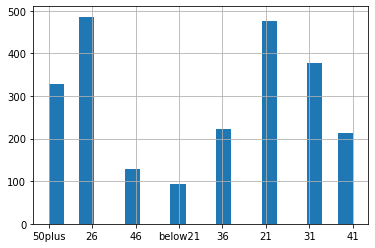

In [402]:
df_train['age'].hist(bins=20)

So, we can clearly see that the majority of people are of 26 age, so we replace all the null values with mode.

In [403]:
df_train['age'] = df_train['age'].fillna(df_train['age'].mode()[0])

We replace this column with dummy variables.

In [404]:
cols = pd.get_dummies(df_train['age'], prefix= 'age')
df_train[cols.columns] = cols
df_train.drop('age', axis = 1, inplace = True)

#### Feature: Marital Status

In [405]:
print("Variable Statistics: ")
df_train['maritalStatus'].describe()

Variable Statistics: 


count                2378
unique                  5
top       Married partner
freq                  962
Name: maritalStatus, dtype: object

In [406]:
print("Total number of null values:", df_train['maritalStatus'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

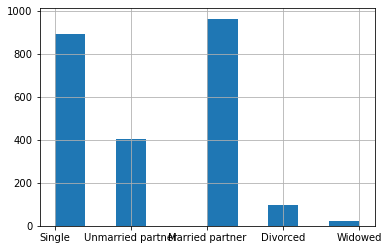

In [407]:
df_train['maritalStatus'].hist(bins=10)

We replace this column with dummy variables.

In [408]:
cols = pd.get_dummies(df_train['maritalStatus'], prefix= 'maritalStatus')
df_train[cols.columns] = cols
df_train.drop('maritalStatus', axis = 1, inplace = True)

#### Feature: Has_children

In [409]:
print("Variable Statistics: ")
df_train['has_children'].describe()

Variable Statistics: 


count    2332.000000
mean        0.419811
std         0.493634
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: has_children, dtype: float64

In [410]:
print("Total number of null values:", df_train['has_children'].isnull().sum())

Total number of null values: 46


<AxesSubplot:>

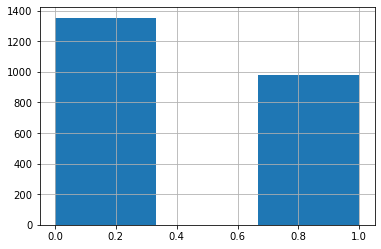

In [411]:
df_train['has_children'].hist(bins=3)

Since, the majority of people does not have children, so we will replace all the values with mode.

In [412]:
df_train['has_children'] = df_train['has_children'].fillna(df_train['has_children'].mode()[0])

#### Feature: Education

In [413]:
print("Variable Statistics: ")
df_train['education'].describe()

Variable Statistics: 


count                 2378
unique                   6
top       Bachelors degree
freq                   805
Name: education, dtype: object

In [414]:
print("Total number of null values:", df_train['education'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

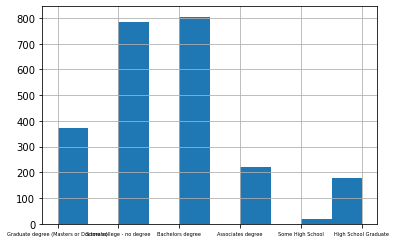

In [415]:
df_train['education'].hist(bins=10, xlabelsize=5)

We replace this column with dummy variables.

In [416]:
cols = pd.get_dummies(df_train['education'], prefix= 'education')
df_train[cols.columns] = cols
df_train.drop('education', axis = 1, inplace = True)

#### Feature: Occupation

In [417]:
print("Variable Statistics: ")
df_train['occupation'].describe()

Variable Statistics: 


count           2378
unique            25
top       Unemployed
freq             363
Name: occupation, dtype: object

In [418]:
print("Total number of null values:", df_train['occupation'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

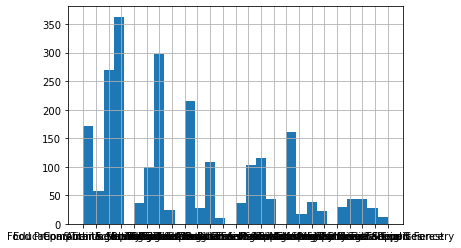

In [419]:
df_train['occupation'].hist(bins = 30)

We replace this column with dummy variables.

In [420]:
cols = pd.get_dummies(df_train['occupation'], prefix= 'occupation')
df_train[cols.columns] = cols
df_train.drop('occupation', axis = 1, inplace = True)

#### Feature: Income

In [421]:
print("Variable Statistics: ")
df_train['income'].describe()

Variable Statistics: 


count                2378
unique                  9
top       $25000 - $37499
freq                  379
Name: income, dtype: object

In [422]:
print("Total number of null values:", df_train['income'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

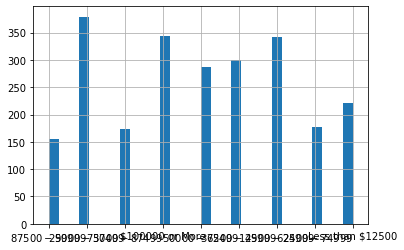

In [423]:
df_train['income'].hist(bins = 30)

We replace this column with dummy variables.

In [424]:
cols = pd.get_dummies(df_train['income'], prefix= 'income')
df_train[cols.columns] = cols
df_train.drop('income', axis = 1, inplace = True)

#### Feature: Car

In [425]:
print("Variable Statistics: ")
df_train['car'].describe()

Variable Statistics: 


count               16
unique               5
top       do not drive
freq                 5
Name: car, dtype: object

In [426]:
print("Total number of null values:", df_train['car'].isnull().sum())

Total number of null values: 2362


There way too many null values in this variable, so we can drop this feature.

In [427]:
df_train.drop('car', axis = 1, inplace = True)

#### Feature: Bar

In [428]:
print("Variable Statistics: ")
df_train['Bar'].describe()

Variable Statistics: 


count      2358
unique        5
top       never
freq        955
Name: Bar, dtype: object

In [429]:
print("Total number of null values:", df_train['Bar'].isnull().sum())

Total number of null values: 20


<AxesSubplot:>

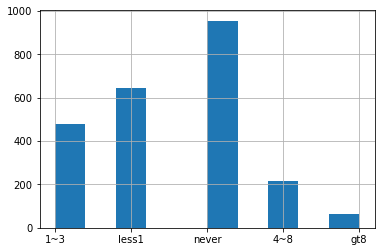

In [430]:
df_train['Bar'].hist(bins=10)

Since most of the Bar is never, so we will replace all the null values with mode.

In [431]:
df_train['Bar'] = df_train['Bar'].fillna(df_train['Bar'].mode()[0])

We replace this column with dummy variables.

In [432]:
cols = pd.get_dummies(df_train['Bar'], prefix= 'Bar')
df_train[cols.columns] = cols
df_train.drop('Bar', axis = 1, inplace = True)

#### Feature: Coffee House

In [433]:
print("Variable Statistics: ")
df_train['CoffeeHouse'].describe()

Variable Statistics: 


count      2338
unique        5
top       less1
freq        629
Name: CoffeeHouse, dtype: object

In [434]:
print("Total number of null values:", df_train['CoffeeHouse'].isnull().sum())

Total number of null values: 40


<AxesSubplot:>

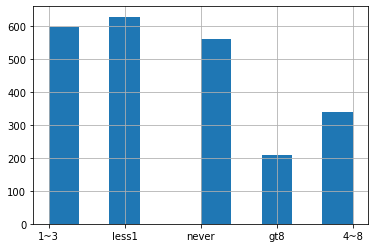

In [435]:
df_train['CoffeeHouse'].hist(bins=10)

Since most of the CoffeeHouse is less1, so we will replace all the null values with mode.

In [436]:
df_train['CoffeeHouse'] = df_train['CoffeeHouse'].fillna(df_train['CoffeeHouse'].mode()[0])

We replace this column with dummy variables.

In [437]:
cols = pd.get_dummies(df_train['CoffeeHouse'], prefix= 'CoffeeHouse')
df_train[cols.columns] = cols
df_train.drop('CoffeeHouse', axis = 1, inplace = True)

#### Feature: CarryAway

In [438]:
print("Variable Statistics: ")
df_train['CarryAway'].describe()

Variable Statistics: 


count     2355
unique       5
top        1~3
freq       875
Name: CarryAway, dtype: object

In [439]:
print("Total number of null values:", df_train['CarryAway'].isnull().sum())

Total number of null values: 23


<AxesSubplot:>

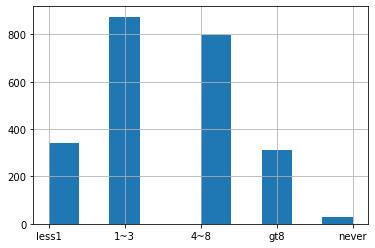

In [440]:
df_train['CarryAway'].hist(bins=10)

Since most of the CarryAway is 1~3, so we will replace all the null values with mode.

In [441]:
df_train['CarryAway'] = df_train['CarryAway'].fillna(df_train['CarryAway'].mode()[0])

We replace this column with dummy variables.

In [442]:
cols = pd.get_dummies(df_train['CarryAway'], prefix= 'CarryAway')
df_train[cols.columns] = cols
df_train.drop('CarryAway', axis = 1, inplace = True)

#### Feature: Restaurant Less Than 20

In [443]:
print("Variable Statistics: ")
df_train['RestaurantLessThan20'].describe()

Variable Statistics: 


count     2352
unique       5
top        1~3
freq      1032
Name: RestaurantLessThan20, dtype: object

In [444]:
print("Total number of null values:", df_train['RestaurantLessThan20'].isnull().sum())

Total number of null values: 26


<AxesSubplot:>

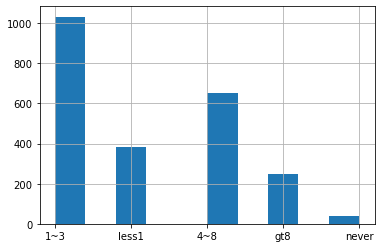

In [445]:
df_train['RestaurantLessThan20'].hist(bins=10)

Since most of the RestaurantLessThan20 is 1~3, so we will replace all the null values with mode.

In [446]:
df_train['RestaurantLessThan20'] = df_train['RestaurantLessThan20'].fillna(df_train['RestaurantLessThan20'].mode()[0])

We replace this column with dummy variables.

In [447]:
cols = pd.get_dummies(df_train['RestaurantLessThan20'], prefix= 'RestaurantLessThan20')
df_train[cols.columns] = cols
df_train.drop('RestaurantLessThan20', axis = 1, inplace = True)

#### Feature: Restaurant20To50

In [448]:
print("Variable Statistics: ")
df_train['Restaurant20To50'].describe()

Variable Statistics: 


count      2351
unique        5
top       less1
freq       1129
Name: Restaurant20To50, dtype: object

In [449]:
print("Total number of null values:", df_train['Restaurant20To50'].isnull().sum())

Total number of null values: 27


<AxesSubplot:>

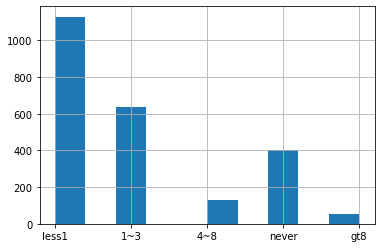

In [450]:
df_train['Restaurant20To50'].hist()

Since most of the Restaurant20To50 is less1, so we will replace all the null values with mode.

In [451]:
df_train['Restaurant20To50'] = df_train['Restaurant20To50'].fillna(df_train['Restaurant20To50'].mode()[0])

We replace this column with dummy variables.

In [452]:
cols = pd.get_dummies(df_train['Restaurant20To50'], prefix= 'Restaurant20To50')
df_train[cols.columns] = cols
df_train.drop('Restaurant20To50', axis = 1, inplace = True)

#### Feature: toCoupon_GEQ5min

In [453]:
print("Variable Statistics: ")
df_train['toCoupon_GEQ5min'].describe()

Variable Statistics: 


count    2378.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: toCoupon_GEQ5min, dtype: float64

In [454]:
print("Total number of null values:", df_train['toCoupon_GEQ5min'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

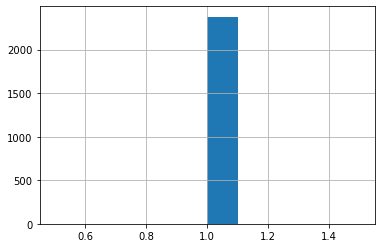

In [455]:
df_train['toCoupon_GEQ5min'].hist()

#### Feature: toCoupon_GEQ15min

In [456]:
print("Variable Statistics: ")
df_train['toCoupon_GEQ15min'].describe()

Variable Statistics: 


count    2378.000000
mean        0.560555
std         0.496424
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: toCoupon_GEQ15min, dtype: float64

In [457]:
print("Total number of null values:", df_train['toCoupon_GEQ15min'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

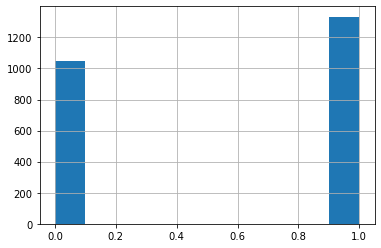

In [458]:
df_train['toCoupon_GEQ15min'].hist()

#### Feature: toCoupon_GEQ25min

In [459]:
print("Variable Statistics: ")
df_train['toCoupon_GEQ25min'].describe()

Variable Statistics: 


count    2378.000000
mean        0.112279
std         0.315776
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: toCoupon_GEQ25min, dtype: float64

In [460]:
print("Total number of null values:", df_train['toCoupon_GEQ25min'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

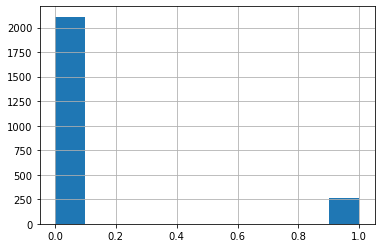

In [461]:
df_train['toCoupon_GEQ25min'].hist()

#### Feature: direction_same

In [462]:
print("Variable Statistics: ")
df_train['direction_same'].describe()

Variable Statistics: 


count    2378.000000
mean        0.224138
std         0.417101
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: direction_same, dtype: float64

In [463]:
print("Total number of null values:", df_train['direction_same'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

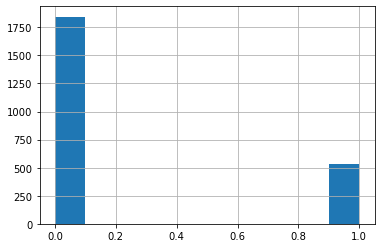

In [464]:
df_train['direction_same'].hist()

#### Feature: direction_opp

In [465]:
print("Variable Statistics: ")
df_train['direction_opp'].describe()

Variable Statistics: 


count    2378.000000
mean        0.775862
std         0.417101
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: direction_opp, dtype: float64

In [466]:
print("Total number of null values:", df_train['direction_opp'].isnull().sum())

Total number of null values: 0


<AxesSubplot:>

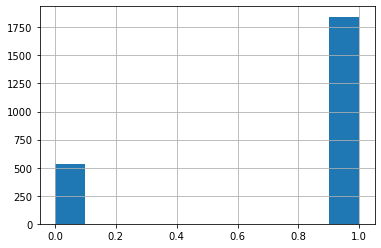

In [467]:
df_train['direction_opp'].hist()

In [472]:
df_train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 111 columns):
 #   Column                                                Dtype  
---  ------                                                -----  
 0   expiration                                            int64  
 1   gender                                                int64  
 2   has_children                                          float64
 3   toCoupon_GEQ5min                                      int64  
 4   toCoupon_GEQ15min                                     int64  
 5   toCoupon_GEQ25min                                     int64  
 6   direction_same                                        int64  
 7   direction_opp                                         int64  
 8   Y                                                     int64  
 9   destination_Home                                      uint8  
 10  destination_No Urgent Place                           uint8  
 11  destination_Work

In [473]:
print("Total number of Null Values: ", df_train.isnull().sum().sum())

Total number of Null Values:  0


We have successfully replaced or handled all the null values and transformed specific variables to dummy variables.

# Preprocessing ``test.csv`` (10 points)

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head()

In [ ]:
df_test.tail()

### Dataset's Shape

In [ ]:
print("Total Number of Columns: ", df_test.shape[1])
print("Total Number of Rows: ", df_test.shape[0])

### General Information about dataset

In [ ]:
df_test.info()

We can see that there are some null values in the dataset.

In [ ]:
print("Total number of Null Values: ", df_test.isnull().sum().sum())

### Various descriptive statistics on the DataFrame

In [ ]:
df_test.describe()

### Handling Individual Features

#### Feature: Destination

In [ ]:
print("Variable Statistics: ")
df_test['destination'].describe()

In [ ]:
print("Total number of null values:", df_test['destination'].isnull().sum())

In [ ]:
df_test['destination'].hist()

#### Feature: Passanger

In [ ]:
print("Variable Statistics: ")
df_test['passanger'].describe()

In [ ]:
print("Total number of null values:", df_test['passanger'].isnull().sum())

In [ ]:
df_test['passanger'].hist()

#### Feature: Weather

In [ ]:
print("Variable Statistics: ")
df_test['weather'].describe()

In [ ]:
print("Total number of null values:", df_test['weather'].isnull().sum())

In [ ]:
df_test['weather'].hist()

Since the majority of weather is sunny, so we replace the missing values with mode.

In [ ]:
df_test['weather'] = df_test['weather'].fillna(df_test['weather'].mode()[0])

#### Feature: Temperature

In [ ]:
print("Variable Statistics: ")
df_test['temperature'].describe()

In [ ]:
print("Total number of null values:", df_test['temperature'].isnull().sum())

In [ ]:
df_test['temperature'].hist(bins = 80)

Since the majority of temperature is 80, so we will replace the null values with mode.

In [ ]:
df_test['temperature'] = df_test['temperature'].fillna(df_test['temperature'].mode()[0])

#### Feature: Time

In [ ]:
print("Variable Statistics: ")
df_test['time'].describe()

In [ ]:
print("Total number of null values:", df_test['time'].isnull().sum())

In [ ]:
df_test['time'].hist()

#### Feature: Coupon

In [ ]:
print("Variable Statistics: ")
df_test['coupon'].describe()

In [ ]:
print("Total number of null values:", df_test['coupon'].isnull().sum())

In [ ]:
df_test['coupon'].hist()

#### Feature: Expiration

In [ ]:
print("Variable Statistics: ")
df_test['expiration'].describe()

In [ ]:
print("Total number of null values:", df_test['expiration'].isnull().sum())

In [ ]:
df_test['expiration'].hist(bins =3)

#### Feature: Gender

In [ ]:
print("Variable Statistics: ")
df_test['gender'].describe()

In [ ]:
print("Total number of null values:", df_test['gender'].isnull().sum())

In [ ]:
df_test['gender'].hist(bins = 3)

So we can see that there are majority of females, so we will replace the null values with mode.

In [ ]:
df_test['gender'] = df_test['gender'].fillna(df_test['gender'].mode()[0])

#### Feature: Age

In [ ]:
print("Variable Statistics: ")
df_test['age'].describe()

In [ ]:
print("Total number of null values:", df_test['age'].isnull().sum())

In [ ]:
df_test['age'].hist(bins =20)

So, we can clearly see that the majority of people are of 21 age, so we replace all the null values with mode

In [ ]:
df_test['age'] = df_test['age'].fillna(df_test['age'].mode()[0])

#### Feature: Marital Status

In [ ]:
print("Variable Statistics: ")
df_test['maritalStatus'].describe()

In [ ]:
print("Total number of null values:", df_test['maritalStatus'].isnull().sum())

In [ ]:
df_test['maritalStatus'].hist()

#### Feature: Has Children

In [ ]:
print("Variable Statistics: ")
df_test['has_children'].describe()

In [ ]:
print("Total number of null values:", df_test['has_children'].isnull().sum())

In [ ]:
df_test['has_children'].hist(bins=3)

Since, the majority of people does not have children, so we will replace all the values with mode.

In [ ]:
df_test['has_children'] = df_test['has_children'].fillna(df_test['has_children'].mode()[0])

#### Feature: Education

In [ ]:
print("Variable Statistics: ")
df_test['education'].describe()

In [ ]:
print("Total number of null values:", df_test['education'].isnull().sum())

In [ ]:
df_test['education'].hist(xlabelsize=4)

#### Feature: Occupation

In [ ]:
print("Variable Statistics: ")
df_test['occupation'].describe()

In [ ]:
print("Total number of null values:", df_test['occupation'].isnull().sum())

In [ ]:
df_test['occupation'].hist(bins =80)

#### Feature: Income

In [ ]:
print("Variable Statistics: ")
df_test['income'].describe()

In [ ]:
print("Total number of null values:", df_test['income'].isnull().sum())

In [ ]:
df_test['income'].hist(bins = 20, xlabelsize=4)

#### Feature: Car

In [ ]:
print("Variable Statistics: ")
df_test['car'].describe()

In [ ]:
print("Total number of null values:", df_test['car'].isnull().sum())

In [ ]:
df_test['car'].hist()

There way too many null values in this variable, so we can drop this feature.

In [ ]:
df_test.drop('car', axis = 1, inplace = True)

#### Feature: Bar

In [ ]:
print("Variable Statistics: ")
df_test['Bar'].describe()

In [ ]:
print("Total number of null values:", df_test['Bar'].isnull().sum())

In [ ]:
df_test['Bar'].hist()

Since most of the Bar is never, so we will replace all the null values with mode.

In [ ]:
df_test['Bar'] = df_test['Bar'].fillna(df_test['Bar'].mode()[0])

#### Feature: Coffee House

In [ ]:
print("Variable Statistics: ")
df_test['CoffeeHouse'].describe()

In [ ]:
print("Total number of null values:", df_test['CoffeeHouse'].isnull().sum())

In [ ]:
df_test['CoffeeHouse'].hist()

Since most of the CoffeeHouse is less1, so we will replace all the null values with mode.

In [ ]:
df_test['CoffeeHouse'] = df_test['CoffeeHouse'].fillna(df_test['CoffeeHouse'].mode()[0])

#### Feature: Carry Away

In [ ]:
print("Variable Statistics: ")
df_test['CarryAway'].describe()

In [ ]:
print("Total number of null values:", df_test['CarryAway'].isnull().sum())

In [ ]:
df_test['CarryAway'].hist()

Since most of the CarryAway is 1~3, so we will replace all the null values with mode.

In [ ]:
df_test['CarryAway'] = df_test['CarryAway'].fillna(df_test['CarryAway'].mode()[0])

#### Feature: RestaurantLessThan20

In [ ]:
print("Variable Statistics: ")
df_test['RestaurantLessThan20'].describe()

In [ ]:
print("Total number of null values:", df_test['RestaurantLessThan20'].isnull().sum())

In [ ]:
df_test['RestaurantLessThan20'].hist()

Since most of the RestaurantLessThan20 is 1~3, so we will replace all the null values with mod

In [ ]:
df_test['RestaurantLessThan20'] = df_test['RestaurantLessThan20'].fillna(df_test['RestaurantLessThan20'].mode()[0])

#### Feature: Restaurant20To50

In [ ]:
print("Variable Statistics: ")
df_test['Restaurant20To50'].describe()

In [ ]:
print("Total number of null values:", df_test['Restaurant20To50'].isnull().sum())

In [ ]:
df_test['Restaurant20To50'].hist()

Since most of the Restaurant20To50 is less1, so we will replace all the null values with mode.

In [ ]:
df_test['Restaurant20To50'] = df_test['Restaurant20To50'].fillna(df_test['Restaurant20To50'].mode()[0])

#### Feature: toCoupon_GEQ5min

In [ ]:
print("Variable Statistics: ")
df_test['toCoupon_GEQ5min'].describe()

In [ ]:
print("Total number of null values:", df_test['toCoupon_GEQ5min'].isnull().sum())

In [ ]:
df_test['toCoupon_GEQ5min'].hist()

#### Feature: toCoupon_GEQ15min

In [ ]:
print("Variable Statistics: ")
df_test['toCoupon_GEQ15min'].describe()

In [ ]:
print("Total number of null values:", df_test['toCoupon_GEQ15min'].isnull().sum())

In [ ]:
df_test['toCoupon_GEQ15min'].hist(bins=3)

#### Feature: toCoupon_GEQ25min

In [ ]:
print("Variable Statistics: ")
df_test['toCoupon_GEQ25min'].describe()

In [ ]:
print("Total number of null values:", df_test['toCoupon_GEQ25min'].isnull().sum())

In [ ]:
df_test['toCoupon_GEQ25min'].hist(bins =3)

#### Feature: direction_same

In [ ]:
print("Variable Statistics: ")
df_test['direction_same'].describe()

In [ ]:
print("Total number of null values:", df_test['direction_same'].isnull().sum())

In [ ]:
df_test['direction_same'].hist(bins =3)

#### Feature: direction_opp

In [ ]:
print("Variable Statistics: ")
df_test['direction_opp'].describe()

In [ ]:
print("Total number of null values:", df_test['direction_opp'].isnull().sum())

In [ ]:
df_test['direction_opp'].hist(bins =3)

In [ ]:
df_test.info()

We have successfully replaced or handled all the null values.

# Machine learning models (20 points)

# Best model ( 5 points)
Explain which machine learning model is the best model for this dataset and why? 

# Grading (50 points)
Your model should predict the outcome for every row in the test.csv. 
You should be able to correctly print the ``final_test_prediction`` executing the following statement: 

In [ ]:
final_test_prediction